In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.ticker as mticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [56]:
# Frequenze suggerite:
pts = 40
hint_nu = np.logspace(1,7, pts, base=10)
print(hint_nu)

[1.00000000e+01 1.42510267e+01 2.03091762e+01 2.89426612e+01
 4.12462638e+01 5.87801607e+01 8.37677640e+01 1.19377664e+02
 1.70125428e+02 2.42446202e+02 3.45510729e+02 4.92388263e+02
 7.01703829e+02 1.00000000e+03 1.42510267e+03 2.03091762e+03
 2.89426612e+03 4.12462638e+03 5.87801607e+03 8.37677640e+03
 1.19377664e+04 1.70125428e+04 2.42446202e+04 3.45510729e+04
 4.92388263e+04 7.01703829e+04 1.00000000e+05 1.42510267e+05
 2.03091762e+05 2.89426612e+05 4.12462638e+05 5.87801607e+05
 8.37677640e+05 1.19377664e+06 1.70125428e+06 2.42446202e+06
 3.45510729e+06 4.92388263e+06 7.01703829e+06 1.00000000e+07]


In [57]:
nu = np.array([0.867,5.678,9.124,13.560,20.220,41.81,58.99,82.84,120.05,180.74,240.22,349.96,498.1,707.2,996.8,1414,2068,2831,4258,5780,8507,11310,17417,
24670,34402,51335,70877,100180,144190,200240,276700,415800,582400,838600,1.206e6,1.712e6,2.475e6,3.356e6,5.040e6,7.33e6,10.47e6])
V_in = np.array([43,42.2,43.4,43.8,42.6,43.8,44.2,43.8,43.8,42.6,42.2,42.6,43.4,43.4,43.4,43.8,44.2,43,43,44.2,43.8,45.4,45,
42.6,44.2,43.4,43,41.8,43.8,39.4,39.4,39.4,39.4,36.6,37.4,33.8,32.6,32.2,31.4,32.2,31.8])*10**-3
V_out = np.array([0.024,0.040,0.040,0.040,0.040,0.044,0.068,0.040,0.04,0.04,0.044,0.0338,0.0402,0.0498,0.0639,0.086,0.121,0.165,0.241,0.324,0.470,0.603,0.880,
1.15,1.42,1.77,1.95,2.07,2.11,2.17,2.13,2.09,1.99,1.81,1.59,1.25,0.98,0.74,0.5,0.320,0.2])

In [58]:
sigmaV = lambda a: a*0.03

In [59]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st

In [60]:
print(tabmaker([(sigmaV, V_in), (sigmaV, V_out)]))

$0.043\pm0.0$ & $0.024\pm0.0$ &  \\ $0.0422\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0434\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0438\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0426\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0438\pm0.0$ & $0.044\pm0.0$ &  \\ $0.0442\pm0.0$ & $0.068\pm0.0$ &  \\ $0.0438\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0438\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0426\pm0.0$ & $0.04\pm0.0$ &  \\ $0.0422\pm0.0$ & $0.044\pm0.0$ &  \\ $0.0426\pm0.0$ & $0.0338\pm0.0$ &  \\ $0.0434\pm0.0$ & $0.0402\pm0.0$ &  \\ $0.0434\pm0.0$ & $0.0498\pm0.0$ &  \\ $0.0434\pm0.0$ & $0.0639\pm0.0$ &  \\ $0.0438\pm0.0$ & $0.086\pm0.0$ &  \\ $0.0442\pm0.0$ & $0.121\pm0.0$ &  \\ $0.043\pm0.0$ & $0.165\pm0.0$ &  \\ $0.043\pm0.0$ & $0.241\pm0.01$ &  \\ $0.0442\pm0.0$ & $0.324\pm0.01$ &  \\ $0.0438\pm0.0$ & $0.47\pm0.01$ &  \\ $0.0454\pm0.0$ & $0.603\pm0.02$ &  \\ $0.045\pm0.0$ & $0.88\pm0.03$ &  \\ $0.0426\pm0.0$ & $1.15\pm0.03$ &  \\ $0.0442\pm0.0$ & $1.42\pm0.04$ &  \\ $0.0434\pm0.0$ & $1.77\pm0.05$ &  \\ $0.043\pm0.0$ & $1.95\pm0.06$ &  \\ $0.041

In [61]:
T = V_out/V_in

In [74]:
T[27:34].mean()

51.405564903533026

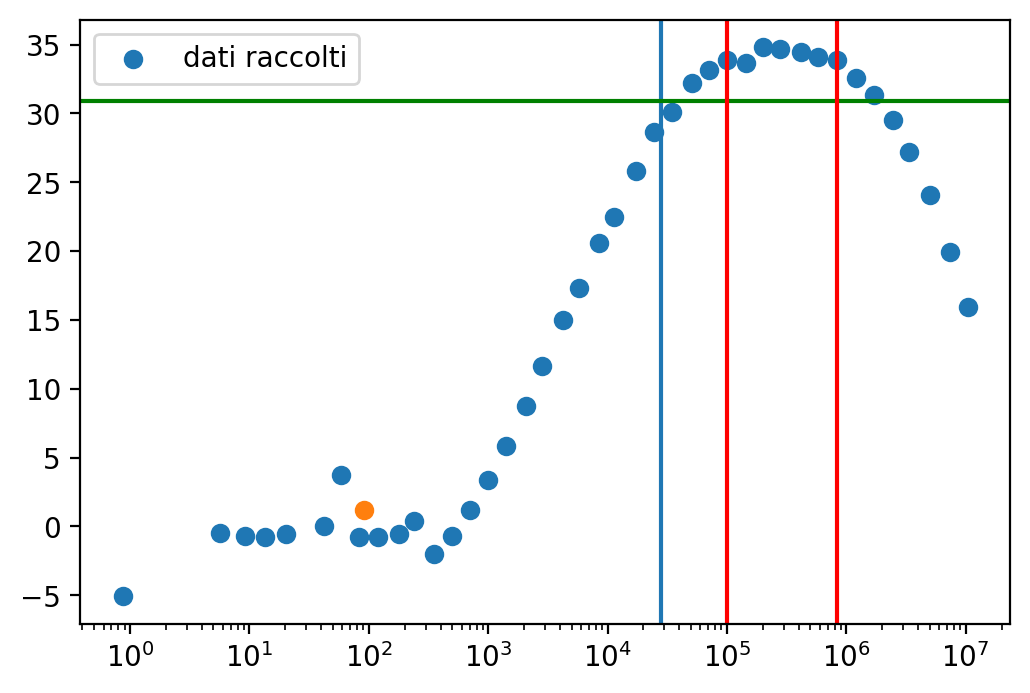

In [88]:
fig = plt.figure()
ay = fig.add_subplot(1, 1, 1)
ay.set_xscale('log')
plt.axvline(27856)
plt.axhline(20*np.log10(T[26:35].mean()/np.sqrt(2)),c="green")
plt.axvline(nu[27],c="r")
plt.axvline(nu[33],c="r")
plt.xscale("log")
plt.scatter(nu,20*np.log10(T), label="dati raccolti")
plt.legend()
plt.scatter(91,36/31)

In [95]:
[500.3,704.5,1001,2946,4988,6997,9976,20180,29838,49692]
nu_2 = np.array([497,693.7,1082,3082,5090,6915,10082,20187])
#V_in_2 = np.array([30.6,33,32.2,32.6,31.8,30.6,30.2,29.3,30.6,29.7])*10**-3
#V_out_2 = np.array([10,14,18,60,125,181,263,540,724,1010])*10**-3
V_in_2 = np.array([30.6,32.6,31.8,31.8,30.6,30.2,31.4,30.6])*10**-3
V_out_2 = np.array([6.6,7.6,8,11.9,15.7,16.1,18.7,21])*10**-3

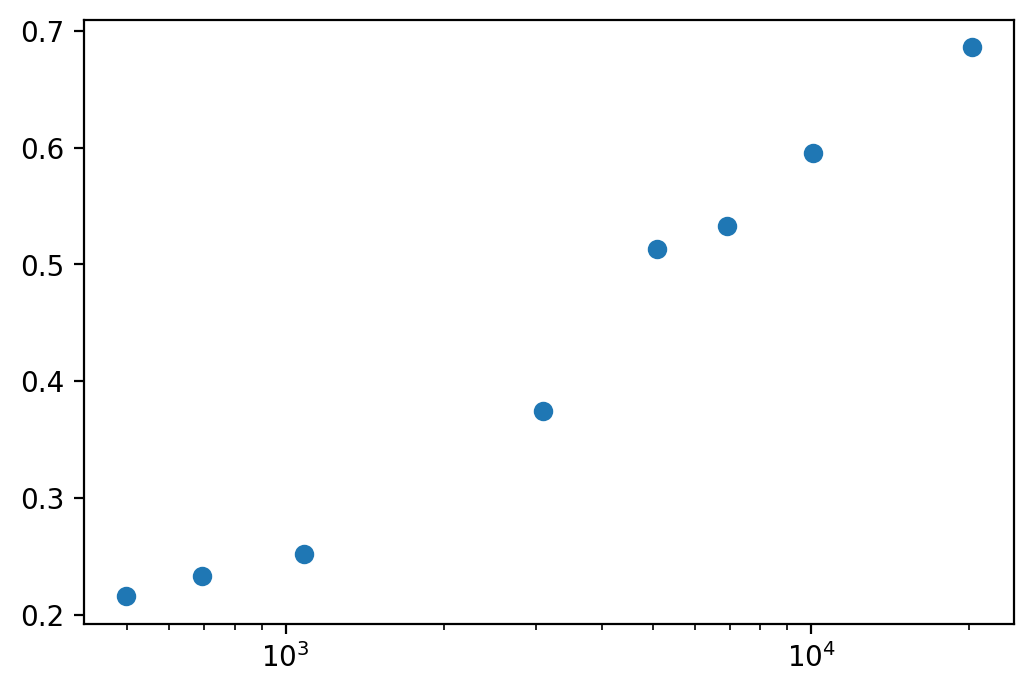

In [96]:
plt.xscale("log")
plt.scatter(nu_2, V_out_2/V_in_2)